/tmp/ipykernel_1922410/3133206872.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


Sum of ignored spans:  1723
counts: 
 0     11195
1      4813
2      1927
3       746
4       356
5       188
6        69
7        29
8        17
9        16
10        8
11        5
12        3
14        1
15        4
16        1
19        1
20        1
Name: error_count, dtype: int64


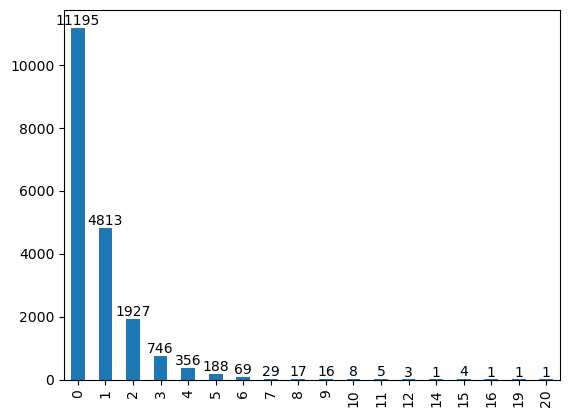

percents: 
 0     0.577657
1     0.248349
2     0.099432
3     0.038493
4     0.018369
5     0.009701
6     0.003560
7     0.001496
8     0.000877
9     0.000826
10    0.000413
11    0.000258
12    0.000155
14    0.000052
15    0.000206
16    0.000052
19    0.000052
20    0.000052
Name: error_count, dtype: float64


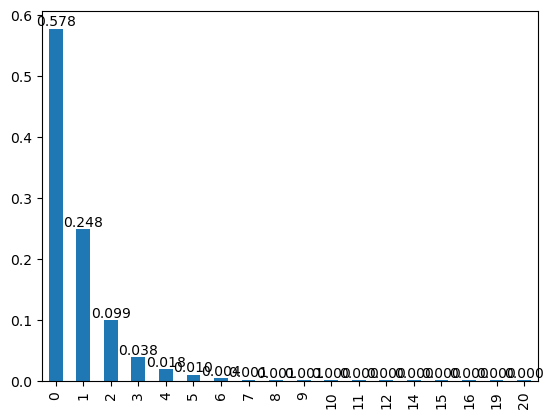

In [1]:

import pandas as pd
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
tqdm.pandas()

%matplotlib inline

def get_spans(sentence):
  # sentence = "যানি না এই কমেন্ট পড়বেন কিনা ।,$যানি না$ এই কমেন্ট পড়বেন কিনা$ $।"
  # sentence = "$যানি না$ এই কমেন্ট পড়বেন কিনা$ $।"
  # sentence = "মা যদি আমার জীবনচরিত  লেখেন$$ $তা হলে$ আমি সকাল সকাল মরতে রাজি আছি।"
  # sentence = "লেখেন$$ $তা হলে$ আমি সকাল সকাল মরতে রাজি আছি।"
  # sentence = "a$bc$bcde$efg$gh$$ij$dgd$"
  # print(sentence)
  # Find all the span indices between $ and $ without considering the $ signs
  span_indices = [m.span() for m in re.finditer(r"\$.*?\$", sentence)]
  error_count = len(span_indices)
  # Don't touch the sentence if the number of dollars is odd
  # Remove all the $ signs from the sentence
  out_sentence = sentence.replace("$", "")
  # Check whether the out_sentence contains punctuation marks
  # print(span_indices)
  spans = []
  count_ignore = 0
  # B = 1, I = 2
  Bs = [] # Begin
  Is = [] # Inside
  Es = [] # $$ handle
  for i, span in enumerate(span_indices):
    offset = 2*i + 1
    start = span[0] + 1
    start = start - offset
    end = span[1] - 1
    end = end - offset

    if span[1] - span[0] < 3: # ignore $$ for now
      count_ignore += 1
      # continue
    #   print("Output sentence: ", out_sentence)
    #   print("Ignored span: ", span)
      # Find the index of the first space before the span from end
    #   print("out_sentence[:start]: ", out_sentence[:start].replace(" ", "X"))
      index = out_sentence[:start].rfind(" ")
      index += 1
    #   print("index: ", index, "out_sentence[index]: ", out_sentence[:index].replace(" ", "X"))
    #   print("span:", out_sentence[index:start].replace(" ", "X"))
      
      Es+= list(range(index, start))
    #   print("Added to Es: ", range(index, start))
      # exit()
      continue
  
    # offset = 2*i + 1
    # start = span[0] + 1
    # start = start - offset
    # end = span[1] - 1
    # end = end - offset

    # Add to I after first zero is found in out_sentence[start:end]
    mid = 0
    chunk = out_sentence[start:end]
    # print("chunk: ", chunk)
    if len(chunk) == 0: continue
    # print("chunk[0]: ", out_sentence[start])

    # if chunk[0] == " ":
    Bs.append(start)
    # print("Added to Bs: ", start)
    
    for j in range(start + 1, end):
      if out_sentence[j] == " ":
        mid = 1
      if mid: Is.append(j)
      else: Bs.append(j)

    # print("start: ", start, "end: ", end, "offset: ", offset)
    output_span = list(range(start, end))
    # print(out_sentence[start:end].replace(" ", "X"))
    # spans.append(output_span)
    spans.extend(output_span)
  
  # print("Output sentence: ", out_sentence)
  # print("Output spans: ", spans)
  # print("Bs: ", Bs)
  # print("Is: ", Is)
  # print("Number of ignored spans: ", count_ignore)
  if count_ignore > 0:
    with open("processed_data/ignored_4cls.txt", "a", encoding="utf-8") as f:
      f.write(sentence + "\n")
    # print("Sentence: ", sentence)
  # exit()
  return out_sentence, spans, count_ignore, Bs, Is, Es,error_count

if __name__ == "__main__":
  with open("processed_data/ignored_4cls.txt", "w", encoding="utf-8") as f:
    f.write("")
  # Read data from DataSetFold1.csv\DataSetFold1.csv
  import pandas as pd
  df = pd.read_csv(r"DataSetFold1_u.csv/DataSetFold1_u.csv")
  df2 = pd.read_csv(r"DataSetFold2.csv/DataSetFold2.csv")
  df = df.append(df2)
  # Apply the get_spans function to the text column
  df["text"], df["spans"], df["count_ignore"], df["Bs"], df["Is"], df["Es"],df["error_count"] = zip(*df["gt"].apply(get_spans))
  print("Sum of ignored spans: ", df["count_ignore"].sum())
  
  # exit()
  # Check whether gt and text columns are equal
  df["same"] = df["gt"] == df["text"]
  
#   plt.hist(df['error_count'], bins=100)
  counts = df['error_count'].value_counts().sort_index()
  ax=counts.plot(kind='bar')
  for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
  print("counts: \n", counts)
  plt.show()
  percent = counts/len(df)
  print("percents: \n", percent)
  ax=percent.plot(kind='bar',)
  for i, v in enumerate(percent):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom')

  plt.show()